In [41]:
import itk
import math

def resample_image(input_image, output_image, example_action=0):
    # Define the dimension and pixel types
    Dimension = 2
    InputPixelType = itk.UC  # Unsigned char
    OutputPixelType = itk.UC

    # Define image types
    InputImageType = itk.Image[InputPixelType, Dimension]
    OutputImageType = itk.Image[OutputPixelType, Dimension]

    # Read input image
    reader = itk.ImageFileReader[InputImageType].New()
    reader.SetFileName(input_image)

    # Resample filter
    filter = itk.ResampleImageFilter[InputImageType, OutputImageType].New()

    # Affine transformation
    transform = itk.AffineTransform[itk.D, Dimension].New()

    # Nearest neighbor interpolator
    interpolator = itk.NearestNeighborInterpolateImageFunction[InputImageType, itk.D].New()
    filter.SetInterpolator(interpolator)

    # Set default pixel value to avoid holes
    filter.SetDefaultPixelValue(100)

    # Set output spacing
    spacing = [0.3,0.3] # [40.0 / 40.0, 30.0 / 40.0]  # Example values for X and Y
    filter.SetOutputSpacing(spacing)

    # Preserve input image orientation
    filter.SetOutputDirection(reader.GetOutput().GetDirection())

    # Set output image origin
    origin = [50.0, 130.0]  # Example origin for X and Y
    filter.SetOutputOrigin(origin)

    # Set output image size
    size = [1000,1000] #[5 * 40, 4 * 40]  # Example size for X and Y
    filter.SetSize(size)

    # Set input image
    filter.SetInput(reader.GetOutput())

    # Translation before rotation
    translation1 = [-origin[0], -origin[1]]
    transform.Translate(translation1)

    # Perform rotation (convert degrees to radians)
    degrees_to_radians = math.pi / 180.0
    transform.Rotate2D(-30.0 * degrees_to_radians, pre=False)

    # Translation after rotation
    translation2 = [origin[0], origin[1]]
    transform.Translate(translation2, pre=False)

    # Apply the transformation
    filter.SetTransform(transform)

    # Write output image if exampleAction is 0
    if example_action == 0:
        writer = itk.ImageFileWriter[OutputImageType].New()
        writer.SetFileName(output_image)
        writer.SetInput(filter.GetOutput())
        try:
            writer.Update()
        except Exception as e:
            print(f"Exception caught: {e}")

# Example usage within a script (adjust file paths as necessary)
input_image = 'Brain_CT.jpg'
output_image = 'output_image.png'
resample_image(input_image, output_image, example_action=0)


(-0.5, 999.5, 999.5, -0.5)

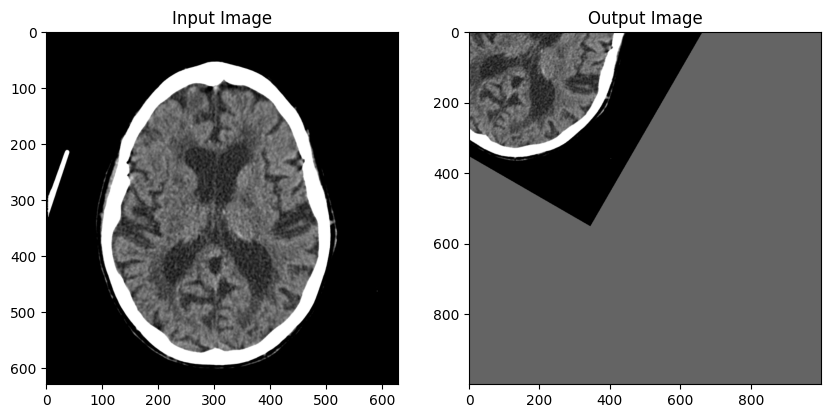

In [42]:
# Plotting the input and output images
import matplotlib.pyplot as plt
import numpy as np

input_image = itk.imread(input_image)
output_image = itk.imread(output_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('Input Image')
#plt.xticks(np.arange(0, 1000, 100))
#plt.yticks(np.arange(0, 1000, 100))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('Output Image')
#plt.xticks(np.arange(0, 1000, 100))
#plt.yticks(np.arange(0, 1000, 100))
plt.axis('on')

